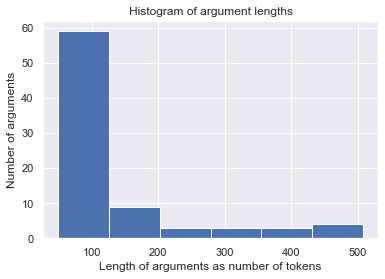

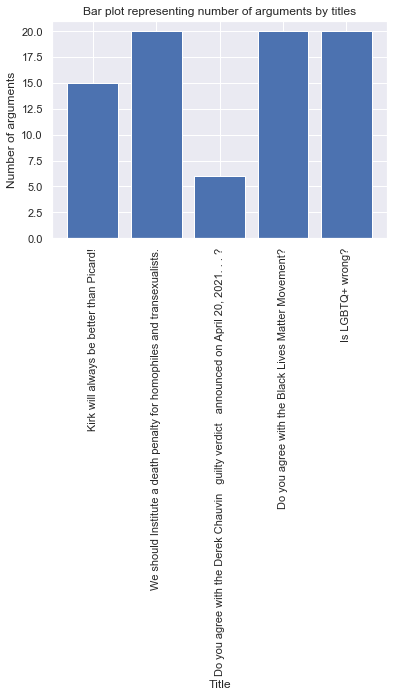

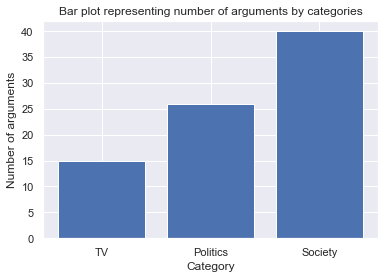

In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# open and load the json file that is generated from the given website using scrapy
f=open('debates1.json')
json_data=json.load(f)

sns.set()

# declaration of required lists
token_size_lst=[]
categ_lst=[]
title_lst=[]
total_args=[0,0,0,0,0]
title_total_args=[]

# function to tokenize the selected argument and returns the number of tokens generated from the same argument
def tokenization(sentence):
    return len(sentence.split())

# function to calculate the number of tokens of every argument an returns the list containing length of those arguments 
def Argument_Length(json_data):
    for i in range(0,5):
        for j in range(0, len(json_data[i]['pro_arguments'])):
            arg_size=tokenization(json_data[i]['pro_arguments'][j]['body']) 
            token_size_lst.append(arg_size) # appends the number of tokens of a single pro-argument to the list
        
        for k in range(0, len(json_data[i]['con_arguments'])):
            arg_size=tokenization(json_data[i]['con_arguments'][k]['body'])
            token_size_lst.append(arg_size) # appends the number of tokens of a single con-argument to the list
    return token_size_lst

# function to calculate the number of arguments (both pros and cons) of each title and category
# and returns topic list, category list and the lists that contain number of arguments for each topic and category
def Category_Title(json_data):
    for i in range(0,5):
        categ_str=json_data[i]['category'] 
        title_lst.append(json_data[i]['topic']) # appends all the debate topics to the list
        #appends the total number of arguments (pros and cons) of each topic to the list
        title_total_args.append(len(json_data[i]['pro_arguments'])+len(json_data[i]['con_arguments']))  
        
        #checks if the category is already present in the list
        if categ_str not in categ_lst:
            categ_lst.append(categ_str) # appends all the distinct categories to the list
        
        for j in range(0,len(categ_lst)):
            if categ_str==categ_lst[j]:
                #calculates the total number of arguments (pros and cons) of each category to the list
                arg_count=total_args[j]+len(json_data[i]['pro_arguments'])+len(json_data[i]['con_arguments'])
                total_args[j]=arg_count
    del total_args[len(categ_lst):]
    return title_lst,title_total_args,categ_lst,total_args

# function calls to perform their respective tasks
token_size_lst = Argument_Length(json_data)
(title_lst,title_total_args,categ_lst,total_args) = Category_Title(json_data)

# creates histogram of argument lengths 
plt.hist(token_size_lst,bins=6)
plt.title('Histogram of argument lengths')
plt.xlabel('Length of arguments as number of tokens')
plt.ylabel('Number of arguments')
plt.savefig('arguments.png',dpi=100, quality=500)
plt.show()

# creates a bar graph that represents the number of arguments by titles
plt.bar(title_lst,title_total_args)
plt.title('Bar plot representing number of arguments by titles')
plt.xlabel('Title')
plt.ylabel('Number of arguments')
plt.xticks(rotation=90)
plt.savefig('title.png',dpi=100, quality=500)
plt.show()

# creates a bar graph that represents the number of arguments by categories
plt.bar(categ_lst,total_args)
plt.title('Bar plot representing number of arguments by categories')
plt.xlabel('Category')
plt.ylabel('Number of arguments')
plt.savefig('category.png',dpi=100, quality=500)
plt.show()